# Speed Dating experiment - the difference in behavior and perception by gender and race
## by Kazu Fukuda

## Preliminary Wrangling

> I analyze Speed Dating experiment dataset on Kaggle(https://www.kaggle.com/annavictoria/speed-dating-experiment) to understand the difference in behavior and perception depending on participants' gender and race.

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

### Introduction

I analyze Speed Dating experiment dataset on Kaggle(https://www.kaggle.com/annavictoria/speed-dating-experiment) that consists of the individual choices of people when selecting their dates in the speed dating environment by Columbia graduate school students. <br>
#### Background
When I first moved to the US as a graduate student, I was shocked to see a lot of stereotypes attached to Asian such as “bad drivers” and “good at Math”. <br>
As an Asian male, I also often hear gossips/stories from a couple of friends that Asian males are the least popular gender and ethnic group in the US. Therefore, I am curious as to how gender and race affect the behavior and perception of people in the dating scene


In [3]:
df_full = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

In [4]:
df_full.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### The structure of the dataset

In the experiment, each participant fills out their biological information.<br> 
In each session, participants rated partners based on the following criteria on a scale of 1-10:<br> 
1) Attractiveness, 2) Sincere, 3) Intelligent ,4) Fun, 5) Ambitious, 6) Shared interests,7) Overall like( willingness to date the partner of the session)<br>
Participants attended speed dating events and conducted 4,174 sessions.<br>
After rating their partner, they decide whether they want to see the partner again(decision). When both of them want to see each other again, then they are “matched” and they can exchange their phone numbers.<br>

### The main features of interest in the dataset

##### [Id]
**`iid`**: Participant's ID<br>
**`pid`**: Partner's ID<br>

##### [Gender]
**`gender`**:	Female=0, Male=1 <br>

##### [Race]
**`race`**:Black/African American=1, European/Caucasian American=2,Latino/Hispanic American=3,Asian/Pacific Islander/Asian-American=4,Native American=5, Other=6 <br>
**`race_o`**:Race of partner<br>
**`samerace`**:Partner is the same race 1=yes, 0=no<br>

##### [Decision]
**`dec`** Decision of a session 1=yes, 0=no <br>
**`dec_o`** Partner's decision of a session 1=yes, 0=no  <br>

##### [Rating]
**`like_o`** Overall, how much do you like this person?(1=don't like at all, 10=like a lot)<br>
**`attr_o`** Attractive rating of partner(1=awful, 10=great)<br>
**`sinc_o`** Sincere rating of partner(1=awful, 10=great)<br>
**`intel_o`** Intelligent rating of partner(1=awful, 10=great)<br>
**`fun_o`** Fun rating of partner(1=awful, 10=great)<br>
**`amb_o`** Ambitious rating of partner(1=awful, 10=great)<br>
**`shar_o`** Shared Interests/Hobbies rating of partner(1=awful, 10=great)<br>

### Features in the dataset that will help support my investigation

Based on my research interest, I analyze the difference in the Decision and Rating(given and received) by gender and race

## Univariate Exploration -The distribution of the probability of being selected and the overall rating score given to and received by their partners

> As the first univariate exploration, I analyze the distribution of the probability of being selected and the overall rating score(**`like_o`**) given to and received by their partners

### Assess - Univariate Exploration

In [5]:
# extract relevant columns
df_before_clean = pd.DataFrame(df_full, columns=['iid', 'pid','gender','dec', 'dec_o','race','race_o','samerace' ,'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o'])

In [6]:
df_before_clean.sample(5)

,iid,pid,gender,dec,dec_o,race,race_o,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
1392,97,82.0,1,0,0,2.0,6.0,0,8.0,9.0,10.0,7.0,8.0,8.0,7.0
3836,264,287.0,0,0,1,2.0,4.0,0,8.0,8.0,8.0,8.0,7.0,10.0,9.0
1317,93,97.0,0,1,1,2.0,2.0,1,8.0,8.0,8.0,8.0,7.0,8.0,7.0
1452,100,88.0,1,0,0,6.0,2.0,0,4.0,10.0,10.0,6.0,10.0,9.0,7.0
589,44,30.0,1,1,0,2.0,2.0,1,6.0,9.0,7.0,5.0,6.0,3.0,7.0


In [7]:
df_before_clean.describe()

,iid,pid,gender,dec,dec_o,race,race_o,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
count,8378.000000,8368.000000,8378.000000,8378.000000,8378.000000,8315.000000,8305.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000
mean,283.675937,283.863767,0.500597,0.419909,0.419551,2.757186,2.756653,0.395799,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498
std,158.583367,158.584899,0.500029,0.493573,0.493515,1.230905,1.230689,0.489051,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,154.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000
50%,281.000000,281.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000
75%,407.000000,408.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000
max,552.000000,552.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000


In [8]:
# check data type and null value
df_before_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
iid         8378 non-null int64
pid         8368 non-null float64
gender      8378 non-null int64
dec         8378 non-null int64
dec_o       8378 non-null int64
race        8315 non-null float64
race_o      8305 non-null float64
samerace    8378 non-null int64
attr_o      8166 non-null float64
sinc_o      8091 non-null float64
intel_o     8072 non-null float64
fun_o       8018 non-null float64
amb_o       7656 non-null float64
shar_o      7302 non-null float64
like_o      8128 non-null float64
dtypes: float64(10), int64(5)
memory usage: 981.9 KB


### Clean - Univariate Exploration

#### Define
- **Null Value**: drop null values
- **Data Type**: convert float to int for the comparison

- **Find the probability of being selected**: group by iid and find the sum of dec_o. Then divide it by the total number of session
- **Find the rating score given to their partners** : group by iid and find the mean rating scores.
- **Find the rating score received by their partners** : group by pid and find the mean rating scores.

In [9]:
# create a copy before cleaning
df = df_before_clean.copy()

In [10]:
# drop null values
df = df.dropna()

In [11]:
# convert float to int
df = df.astype(int)
df

,iid,pid,gender,dec,dec_o,race,race_o,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,11,0,1,0,4,2,0,6,8,8,8,8,6,7
1,1,12,0,1,0,4,2,0,7,8,10,7,7,5,8
2,1,13,0,1,1,4,4,1,10,10,10,10,10,10,10
3,1,14,0,1,1,4,2,0,7,8,9,8,9,8,7
4,1,15,0,1,1,4,3,0,8,7,9,6,9,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526,1,0,1,2,3,0,10,5,3,2,6,5,6
8374,552,527,1,0,0,2,6,0,6,3,7,3,7,2,2
8375,552,528,1,0,0,2,3,0,2,1,2,2,2,1,2
8376,552,529,1,0,1,2,4,0,5,7,5,5,3,6,6


In [12]:
# Find the dec_o by iid
df_grouped_iid_sum = df.groupby(["iid","gender","race","race_o"], as_index=False).sum()
df_grouped_iid_sum = df_grouped_iid_sum[["iid","gender","race", "race_o","dec_o"]]
df_grouped_iid_sum

,iid,gender,race,race_o,dec_o
0,1,0,4,2,3
1,1,0,4,3,1
2,1,0,4,4,1
3,2,0,2,2,4
4,2,0,2,3,1
...,...,...,...,...,...
2011,551,1,1,6,0
2012,552,1,2,2,6
2013,552,1,2,3,1
2014,552,1,2,4,6


In [13]:
# Find mean rating given
df_grouped_iid_mean = df.groupby(["iid","gender","race"], as_index=False).mean()
df_grouped_iid_mean = df_grouped_iid_mean[["iid",'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o']]
df_grouped_iid_mean

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
1,2,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
2,3,6.555556,6.777778,7.222222,6.222222,7.111111,6.000000,6.000000
3,4,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000,7.300000
4,5,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000,6.100000
...,...,...,...,...,...,...,...,...
540,548,6.842105,5.736842,6.684211,5.789474,6.105263,4.578947,5.526316
541,549,6.312500,6.500000,6.625000,6.625000,6.000000,4.937500,5.750000
542,550,5.285714,5.952381,6.666667,5.285714,6.428571,4.190476,4.571429
543,551,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333


In [14]:
# Find total round
df_grouped_iid_count = df.groupby("iid", as_index=False).count()
df_grouped_iid_count = df_grouped_iid_count[["iid","dec_o"]]
df_grouped_iid_count = df_grouped_iid_count.rename({"dec_o":'round'},axis=1)
df_grouped_iid_count

,iid,round
0,1,10
1,2,10
2,3,9
3,4,10
4,5,10
...,...,...
540,548,19
541,549,16
542,550,21
543,551,18


In [15]:
# join all iid table
df_grouped_iid_temp = pd.merge(left=df_grouped_iid_sum, right=df_grouped_iid_count, on='iid', how="inner")
df_grouped_iid = pd.merge(left=df_grouped_iid_temp, right=df_grouped_iid_mean, on='iid', how="inner")
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333
2012,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222
2013,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222
2014,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222


In [16]:
# find the probability of being selected
df_grouped_iid["dec_o_prob"] = df_grouped_iid["dec_o"]/df_grouped_iid["round"]
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,dec_o_prob
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.300000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.100000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,6.800000,0.100000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000,0.400000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,7.600000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,6.333333,5.166667,5.833333,0.000000
2012,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.333333
2013,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.055556
2014,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,6.000000,5.166667,5.722222,0.333333


In [17]:
# Find mean ratingss that each pid receives
df_grouped_pid_mean = df.groupby(["pid","gender","race_o"], as_index=False).mean()
df_grouped_pid_mean = df_grouped_pid_mean[["pid","gender","race_o",'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o']]
df_grouped_pid_mean

,pid,gender,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,1,4,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,6.500000
1,2,1,2,6.400000,7.000000,7.700000,6.100000,6.500000,5.700000,6.600000
2,3,1,2,8.100000,8.600000,9.400000,7.700000,8.800000,8.100000,8.200000
3,4,1,2,6.400000,8.900000,8.600000,7.800000,7.800000,7.100000,6.600000
4,5,1,2,6.300000,6.000000,7.000000,6.000000,5.600000,6.200000,7.200000
...,...,...,...,...,...,...,...,...,...,...
525,548,0,2,4.476190,6.714286,5.809524,4.476190,3.904762,2.523810,5.047619
526,549,0,2,4.590909,7.045455,6.909091,6.727273,6.863636,5.454545,5.363636
527,550,0,2,5.636364,5.954545,5.772727,5.500000,5.045455,4.227273,5.500000
528,551,0,1,6.350000,7.100000,7.400000,6.700000,6.700000,5.650000,7.150000


In [18]:
# converet pid to id and rename like_o to like
df_grouped_pid = df_grouped_pid_mean.rename(columns={"pid":"iid", "attr_o": "attr", "sinc_o": "sinc",
                               "intel_o": "intel","fun_o": "fun", "amb_o": "amb", "shar_o": "shar","like_o": "like"})
df_grouped_pid = df_grouped_pid.drop(columns=["gender","race_o"])
df_grouped_pid


,iid,attr,sinc,intel,fun,amb,shar,like
0,1,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,6.500000
1,2,6.400000,7.000000,7.700000,6.100000,6.500000,5.700000,6.600000
2,3,8.100000,8.600000,9.400000,7.700000,8.800000,8.100000,8.200000
3,4,6.400000,8.900000,8.600000,7.800000,7.800000,7.100000,6.600000
4,5,6.300000,6.000000,7.000000,6.000000,5.600000,6.200000,7.200000
...,...,...,...,...,...,...,...,...
525,548,4.476190,6.714286,5.809524,4.476190,3.904762,2.523810,5.047619
526,549,4.590909,7.045455,6.909091,6.727273,6.863636,5.454545,5.363636
527,550,5.636364,5.954545,5.772727,5.500000,5.045455,4.227273,5.500000
528,551,6.350000,7.100000,7.400000,6.700000,6.700000,5.650000,7.150000


> **Note**: Going forward, `like` represents the like score received by their partners, whereas `like_o` represents the like score given to their partners. Same for other attributes

In [19]:
# merge the iid table and pid table
df_grouped_iid = pd.merge(left=df_grouped_iid, right=df_grouped_pid, on='iid', how="inner")

In [20]:
df_grouped_iid

,iid,gender,race,race_o,dec_o,round,attr_o,sinc_o,intel_o,fun_o,...,shar_o,like_o,dec_o_prob,attr,sinc,intel,fun,amb,shar,like
0,1,0,4,2,3,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.300000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
1,1,0,4,3,1,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.100000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
2,1,0,4,4,1,10,6.700000,7.400000,8.000000,7.200000,...,7.100000,6.800000,0.100000,5.700000,7.300000,7.300000,6.80,6.300000,6.500000,6.500000
3,2,0,2,2,4,10,7.700000,7.100000,7.900000,7.500000,...,6.500000,7.600000,0.400000,6.400000,7.000000,7.700000,6.10,6.500000,5.700000,6.600000
4,2,0,2,3,1,10,7.700000,7.100000,7.900000,7.500000,...,6.500000,7.600000,0.100000,6.400000,7.000000,7.700000,6.10,6.500000,5.700000,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,551,1,1,6,0,18,6.277778,6.888889,6.944444,5.666667,...,5.166667,5.833333,0.000000,6.350000,7.100000,7.400000,6.70,6.700000,5.650000,7.150000
1959,552,1,2,2,6,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.333333,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333
1960,552,1,2,3,1,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.055556,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333
1961,552,1,2,4,6,18,7.111111,5.777778,6.000000,5.500000,...,5.166667,5.722222,0.333333,4.833333,6.583333,7.666667,6.75,7.083333,6.166667,6.083333


In [21]:
# create df for male and female
df_grouped_iid_male = df_grouped_iid[df_grouped_iid["gender"] == 1]
df_grouped_iid_female = df_grouped_iid[df_grouped_iid["gender"] == 0]

### Analyzing and visualizing 

In [22]:
# prep for visualization
sns.set()
base_color = sns.color_palette()[0]

In [23]:
# define a function for visualization
def basic_hist(var, var_name, title):
    plt.hist(var, bins = bin_edges)
    plt.title(str(title))
    plt.ylabel("# of people")
    plt.xlabel(str(var_name)+ '(average)')
    plt.axvline(var.mean(), color='red')

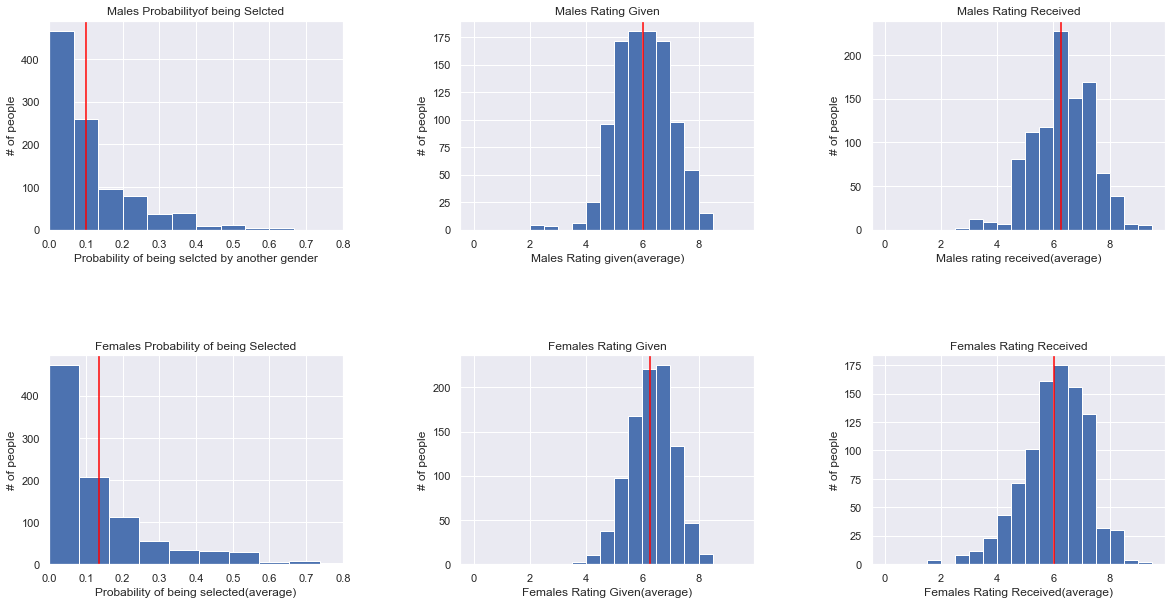

In [24]:
# visualize the distribution of the probability of being selected by their partners and
# the overall rating score given to and received by their partners

plt.figure(figsize = [20, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)
bin_edges = np.arange(0, 10 , 0.5)

plt.subplot(2, 3, 1)
plt.hist(df_grouped_iid_male["dec_o_prob"])
plt.title("Males Probabilityof being Selcted", fontsize=12)
plt.ylabel("# of people")
plt.xlabel("Probability of being selcted by another gender")
plt.axvline(df_grouped_iid_male["dec_o_prob"].mean(), color='red')
plt.xlim(0, 0.8)

plt.subplot(2, 3, 2)
basic_hist(df_grouped_iid_male["like_o"],"Males Rating given", "Males Rating Given")

plt.subplot(2, 3, 3)
basic_hist(df_grouped_iid_male["like"],"Males rating received", "Males Rating Received")

plt.subplot(2, 3, 4)
plt.hist(df_grouped_iid_female["dec_o_prob"])
plt.title("Females Probability of being Selected", fontsize=12)
plt.ylabel("# of people")
plt.xlabel("Probability of being selected(average)")
plt.axvline(df_grouped_iid_female["dec_o_prob"].mean(), color='red')
plt.xlim(0, 0.8)

plt.subplot(2, 3, 5)
basic_hist(df_grouped_iid_female["like_o"],"Females Rating Given", "Females Rating Given")

plt.subplot(2, 3, 6)
basic_hist(df_grouped_iid_female["like"],"Females Rating Received", "Females Rating Received")

In [25]:
# find mean and standard deviation
np.std(df_grouped_iid_male["like_o"]), np.mean(df_grouped_iid_male["like_o"])

(0.9415807029916082, 6.017274899645487)

In [26]:
np.std(df_grouped_iid_male["like"]), np.mean(df_grouped_iid_male["like"])

(1.0761976788763317, 6.282360971741578)

In [26]:
np.std(df_grouped_iid_female["like_o"]), np.mean(df_grouped_iid_female["like_o"])

(0.7985507086083541, 6.288823442241105)

In [27]:
np.std(df_grouped_iid_female["like"]), np.mean(df_grouped_iid_female["like"])

(1.1532051227723936, 6.022244453653137)

> **Observation**: The distribution of the probability of being selected is right-skew for both males and females, and there is no significant observed difference for both gender.<br>
As for the mean rating given to their partners, it is interesting that the distribution of males is more widely spread(standard deviation:0.94) whereas the distribution of females is sharper(standard deviation:0.79).
The mean ratings received for males and females are distributed accordingly.

## Bivariate Exploration

> In this bivariate exploration section, I investigate relationships between race and the the distribution of the probability of being selected and the overall rating score given to and received by their partners. Specifically, I analyze the males' data since that is of my interest in this research

In [28]:
# create df for different races
# Black=1, White=2,Latino=3,Asian=4,Native American=5, Other=6
df_grouped_iid_male_asian = df_grouped_iid_male[df_grouped_iid_male["race"] == 4]
df_grouped_iid_male_non_asian = df_grouped_iid_male[df_grouped_iid_male["race"] != 4]

### The Asian and non Asian males' mean rating score received by females

In [29]:
df_grouped_iid_male_asian["dec_o_prob"]

33      0.111111
34      0.111111
35      0.111111
113     0.000000
114     0.142857
          ...   
1926    0.000000
1927    0.000000
1928    0.000000
1929    0.294118
1930    0.058824
Name: dec_o_prob, Length: 233, dtype: float64

In [30]:
# define a function for visualization
def basic_hist(var, var_name, popu):
    plt.hist(var, bins = bin_edges)
    plt.title(str(popu))
    plt.ylabel("# of people")
    plt.xlabel(str(var_name)+ '(average)')
    plt.axvline(var.mean(), color='red')

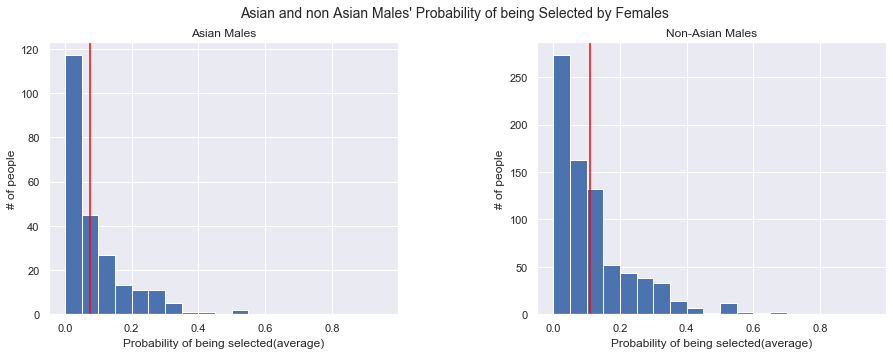

In [31]:
# visualization for Asian and non Asian
bin_edges = np.arange(0, 1 , 0.05)

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.suptitle("Asian and non Asian Males' Probability of being Selected by Females", fontsize=14)

plt.subplot(1, 2, 1)
basic_hist(df_grouped_iid_male_asian["dec_o_prob"],"Probability of being selected", "Asian Males")

plt.subplot(1, 2, 2)
basic_hist(df_grouped_iid_male_non_asian["dec_o_prob"],"Probability of being selected", "Non-Asian Males")

>**Observation**: In the histogram of Asian Males, the proportion of the first (lefthand-most) bin looks biggest. Thus, it is likely that Asian Males are least likely to be selected by females. Let's find P-value of the Asian Males' probability of being chosen by females being less than that of non-Asian

##### find P-value of the Asian Males' mean probability of being selected being less than that of non-Asian 

In [32]:
df_grouped_iid_male[df_grouped_iid_male["race"] != 4].dec_o_prob.mean()

0.10932838407533653

In [33]:
df_grouped_iid_male[df_grouped_iid_male["race"] == 4].dec_o_prob.mean()

0.07543678460346227

In [34]:
# observed difference in match probability
obs_diff = df_grouped_iid_male[df_grouped_iid_male["race"] != 4].dec_o_prob.mean()- df_grouped_iid_male[df_grouped_iid_male["race"] == 4].dec_o_prob.mean()
obs_diff

0.033891599471874256

In [35]:
# simulate sampling distribution for difference in proportions
diffs = []
for _ in range(10000):
    b_samp = df_grouped_iid_male.sample(len(df_grouped_iid_male), replace=True)
    asian_male_mean = b_samp[b_samp["race"] == 4].dec_o_prob.mean()
    non_asian_male_mean = b_samp[b_samp["race"] != 4].dec_o_prob.mean()
    diffs.append(non_asian_male_mean - asian_male_mean)

In [36]:
# convert to numpy
diffs = np.array(diffs)

In [37]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

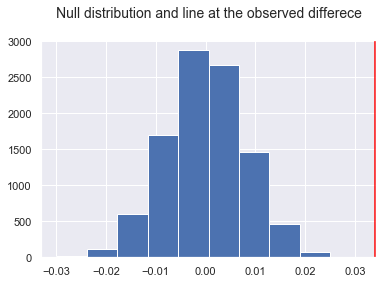

In [38]:
# plot null distribution and line at the observed differece
plt.hist(null_vals)
plt.title("Null distribution and line at the observed differece\n", fontsize=14)
plt.axvline(x=obs_diff, color='red');

In [39]:
# compute p-value
(null_vals > obs_diff).mean()

0.0

>**Observation**:  The Asian Males' probability of being chosen by females(7%) is lower than that of non-Asian(10%)(P-value:0%)

### The Asian and non Asian males' mean rating score received by females

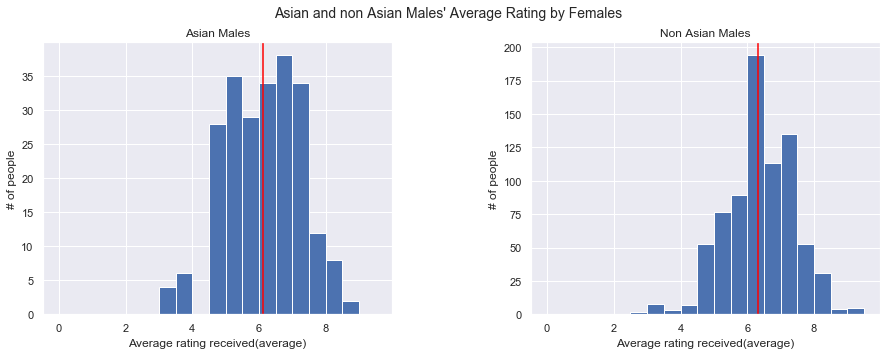

In [40]:
# visualization for Asian and non Asian
bin_edges = np.arange(0,10, 0.5)

plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.suptitle("Asian and non Asian Males' Average Rating by Females", fontsize=14)

plt.subplot(1, 2, 1)
basic_hist(df_grouped_iid_male_asian["like"],"Average rating received", "Asian Males")

plt.subplot(1, 2, 2)
basic_hist(df_grouped_iid_male_non_asian["like"],"Average rating received", "Non Asian Males")

>**Observation**: In the histogram of Asian Males, the proportion of the bins less than 6 looks the biggest. Thus, it is likely that Asian Males have the lowest rating. Let's find P-value of the Asian Males' rating being less than that of non-Asian

##### find P-value of the Asian Males' rating being less than that of non-Asian

In [41]:
df_grouped_iid_male[df_grouped_iid_male["race"] != 4].like.mean()

6.328553599615377

In [42]:
df_grouped_iid_male[df_grouped_iid_male["race"] == 4].like.mean()

6.1289142164869626

In [43]:
# observed difference in mean rating given to Asian Males by Females
obs_diff = df_grouped_iid_male[df_grouped_iid_male["race"] != 4].like.mean()- df_grouped_iid_male[df_grouped_iid_male["race"] == 4].like.mean()
obs_diff

0.19963938312841467

In [44]:
# simulate sampling distribution for difference in proportions
diffs = []
for _ in range(10000):
    b_samp = df_grouped_iid_male.sample(len(df_grouped_iid_male), replace=True)
    asian_male_mean = b_samp[b_samp["race"] == 4].like.mean()
    non_asian_male_mean = b_samp[b_samp["race"] != 4].like.mean()
    diffs.append(non_asian_male_mean - asian_male_mean)

In [45]:
# convert to numpy
diffs = np.array(diffs)

In [46]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

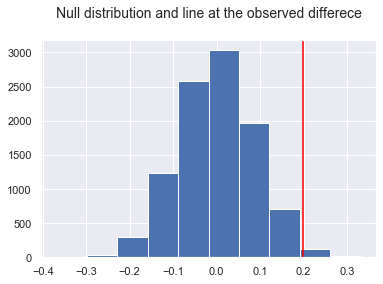

In [47]:
# plot null distribution and line at the observed differece
plt.hist(null_vals)
plt.title("Null distribution and line at the observed differece\n", fontsize=14)
plt.axvline(x=obs_diff, color='red');

In [48]:
# compute p-value
(null_vals > obs_diff).mean()

0.0103

>**Observation**: The Asian Males' mean rating received by females(6.1) is lower than that of non-Asian(6.3)(P-value:0%) (P-value:1%)

## Multivariate Exploration

> I look into how other rating attributes listed below contribute to the Asian Males' likelihood of being selected by females

**`like_o`** Overall, how much do you like this person?(1=don't like at all, 10=like a lot)<br>
**`attr_o`** Attractive rating of partner(1=awful, 10=great)<br>
**`sinc_o`** Sincere rating of partner(1=awful, 10=great)<br>
**`intel_o`** Intelligent rating of partner(1=awful, 10=great)<br>
**`fun_o`** Fun rating of partner(1=awful, 10=great)<br>
**`amb_o`** Ambitious rating of partner(1=awful, 10=great)<br>
**`shar_o`** Shared Interests/Hobbies rating of partner(1=awful, 10=great)<br>

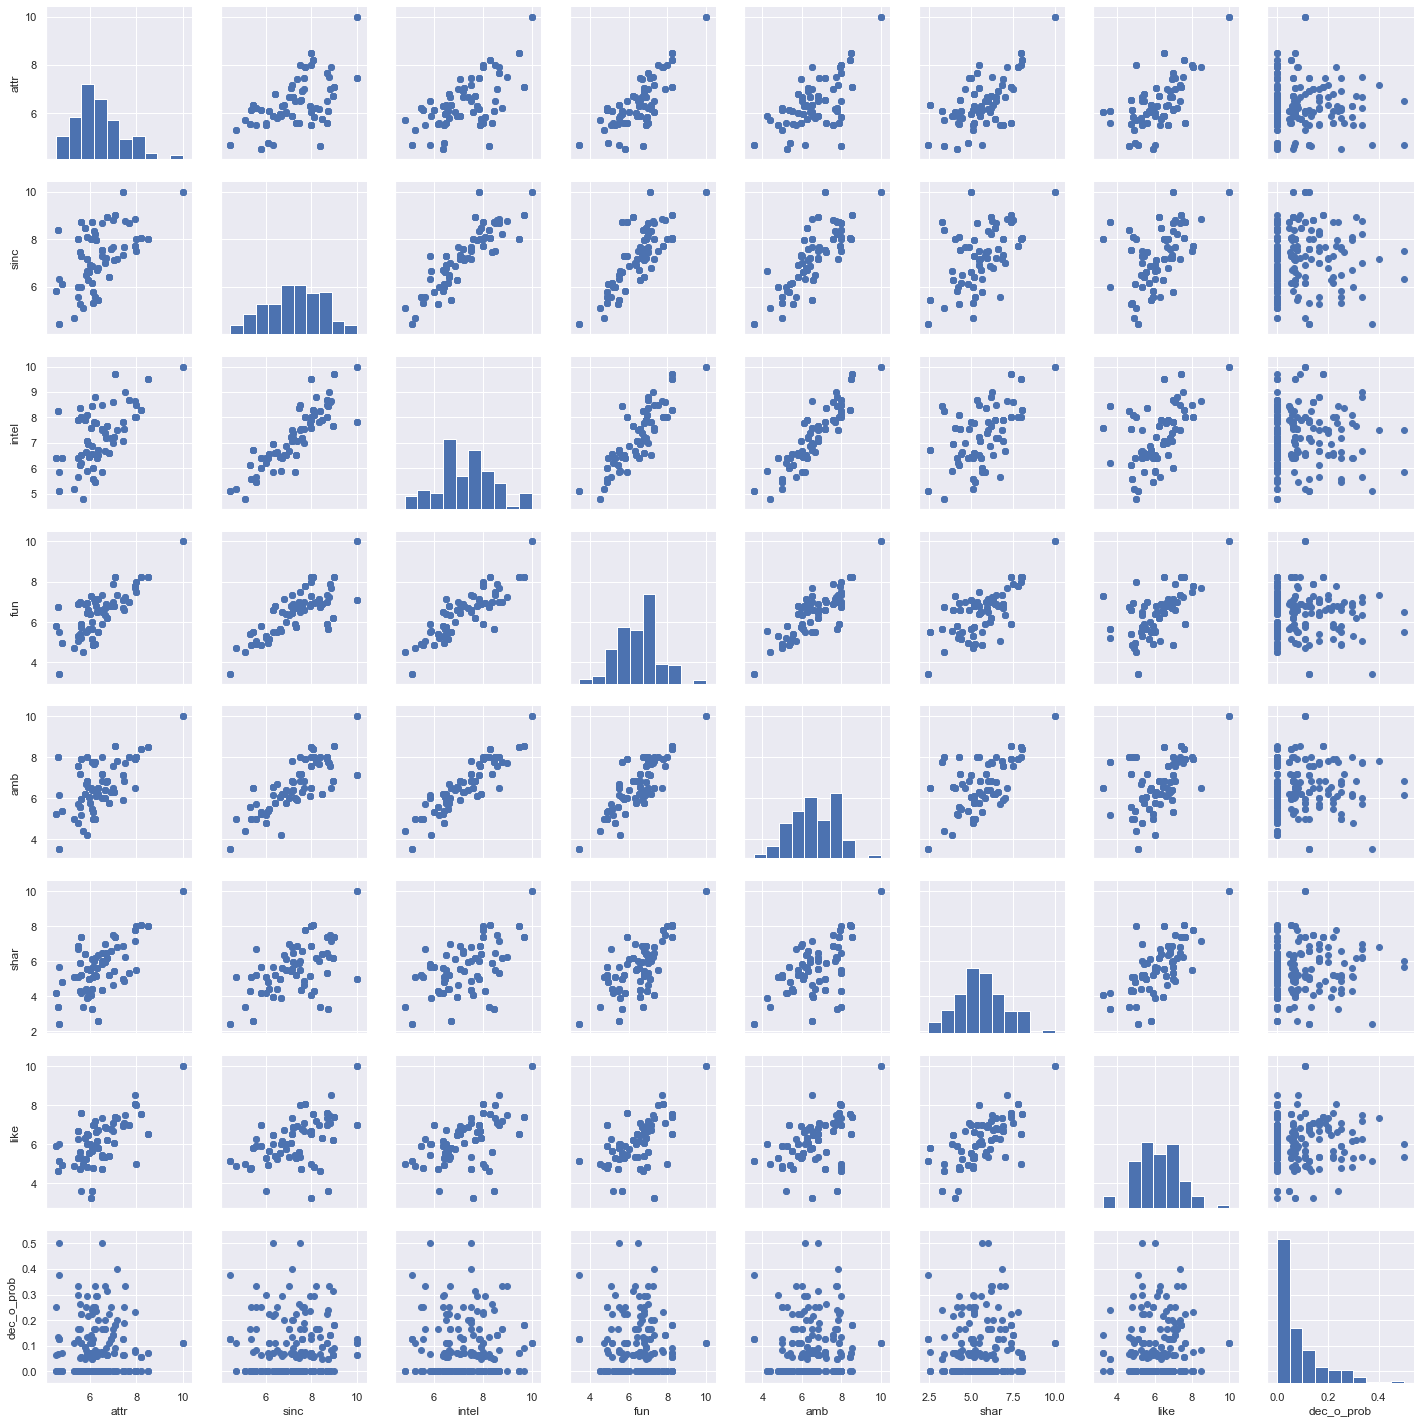

In [49]:
# visualize the distribution of the attributes and the relationship between the probability of being selected
g = sns.PairGrid(data = df_grouped_iid_male_asian, vars = ['attr', 'sinc', 'intel','fun','amb', 'shar','like','dec_o_prob'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> **Observation** : It seems that each attribute score is correlated with each other. In order to identify multicollinearity, I will calculate variance inflation factors. 

> **Observation** : the relationship between the Asian Males' likelihood of being selected by females and the attribute scores is not clear in this plot. Therefore, I will first create the logistic regression models to understand the relationship of those

In [50]:
# create Asian Males' table
df_logit= df[df["gender"] == 0]
df_logit= df_logit[df_logit["race_o"] == 4]

In [51]:
# extract attributes from the table
df_logit = df.drop(columns=["iid","pid","dec_o","race_o","gender"])
df_logit

,dec,race,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o
0,1,4,0,6,8,8,8,8,6,7
1,1,4,0,7,8,10,7,7,5,8
2,1,4,1,10,10,10,10,10,10,10
3,1,4,0,7,8,9,8,9,8,7
4,1,4,0,8,7,9,6,9,7,8
...,...,...,...,...,...,...,...,...,...,...
8373,0,2,0,10,5,3,2,6,5,6
8374,0,2,0,6,3,7,3,7,2,2
8375,0,2,0,2,1,2,2,2,1,2
8376,0,2,0,5,7,5,5,3,6,6


In [52]:
# extract the partners' race from the table to dummies columns
df_logit[['black','white','latino','asian','others']] = pd.get_dummies(df_logit['race'])
df_logit

,dec,race,samerace,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,black,white,latino,asian,others
0,1,4,0,6,8,8,8,8,6,7,0,0,0,1,0
1,1,4,0,7,8,10,7,7,5,8,0,0,0,1,0
2,1,4,1,10,10,10,10,10,10,10,0,0,0,1,0
3,1,4,0,7,8,9,8,9,8,7,0,0,0,1,0
4,1,4,0,8,7,9,6,9,7,8,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,2,0,10,5,3,2,6,5,6,0,1,0,0,0
8374,0,2,0,6,3,7,3,7,2,2,0,1,0,0,0
8375,0,2,0,2,1,2,2,2,1,2,0,1,0,0,0
8376,0,2,0,5,7,5,5,3,6,6,0,1,0,0,0


In [53]:
# check VIF factors
# get y and X dataframes based on this regression:
y, X = dmatrices('dec ~ attr_o + sinc_o + intel_o + fun_o + amb_o + shar_o', df_logit, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [54]:
vif

,VIF Factor,features
0,26.936300,Intercept
1,1.623134,attr_o
2,1.969540,sinc_o
3,2.384343,intel_o
4,2.228861,fun_o
5,1.813974,amb_o
6,1.734911,shar_o


> **Observation**: Surprisingly, all the VIF factors are less than 5. Thus, there is not significant multicollinearity among attributes

In [55]:
# create tables for the White partner and Asian partner for 
# further analysis since they are the two major ethnic group
df_logit_white = df_logit[df_logit["race"] == 2] 
df_logit_asian = df_logit[df_logit["race"] == 4] 

In [56]:
# create a logistic regression of when the partner is white
df_logit_white['intercept'] = 1

logit_mod = sm.Logit(df_logit_white['dec'], df_logit_white[['intercept','attr_o', 'sinc_o', 'intel_o','fun_o','amb_o', 'shar_o']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.661032
         Iterations 5


/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dec   No. Observations:                 3883
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 May 2020   Pseudo R-squ.:                 0.01591
Time:                        17:28:55   Log-Likelihood:                -2566.8
converged:                       True   LL-Null:                       -2608.3
Covariance Type:            nonrobust   LLR p-value:                 8.645e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9648      0.173     -5.569      0.000      -1.304      -0.625
attr_o        -0.1649      0.023     -7.231      0.000      -0.210      -0.120
sinc_o         0.0575      0.027      2.142      0.032       0.005       0.110
intel_o        0.0792      0.033      2.418      0.016       0.015       0.143
fun_o          0.0540      0.026      2.045      0.041       0.002       0.106
amb_o         -0.0164      0.026     -0.643      0.520      -0.066       0.034
shar_o         0.0652      0.021      3.166      0.002       0.025       0.106
==============================================================================
"""

In [57]:
# create a logistic regression of when the partner is asian
df_logit_asian['intercept'] = 1

logit_mod = sm.Logit(df_logit_asian['dec'], df_logit_asian[['intercept','attr_o', 'sinc_o', 'intel_o','fun_o','amb_o', 'shar_o']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.674591
         Iterations 4


/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dec   No. Observations:                 1658
Model:                          Logit   Df Residuals:                     1651
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 May 2020   Pseudo R-squ.:                 0.02537
Time:                        17:28:55   Log-Likelihood:                -1118.5
converged:                       True   LL-Null:                       -1147.6
Covariance Type:            nonrobust   LLR p-value:                 1.029e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0117      0.266     -3.810      0.000      -1.532      -0.491
attr_o        -0.1847      0.033     -5.598      0.000      -0.249      -0.120
sinc_o         0.0649      0.039      1.667      0.096      -0.011       0.141
intel_o        0.1248      0.049      2.561      0.010       0.029       0.220
fun_o          0.0151      0.036      0.422      0.673      -0.055       0.085
amb_o          0.0363      0.035      1.039      0.299      -0.032       0.105
shar_o         0.0483      0.030      1.607      0.108      -0.011       0.107
==============================================================================
"""

> Coef is different in those two logistic regression models. I visualize them below

In [58]:
# define a function for visualization
def log_regplot(data, y, x, y_name, x_name):
    sns.regplot(data=data, y= y , x= x,color=base_color,logistic=True, scatter_kws = {'alpha' : 1/5})
    plt.title('Asian Males '+str(x_name)+' Rating\n and '+str(y_name))
    plt.xlabel(str(x_name)+' Rating')
    plt.ylabel("Yes(1) or No(0)")

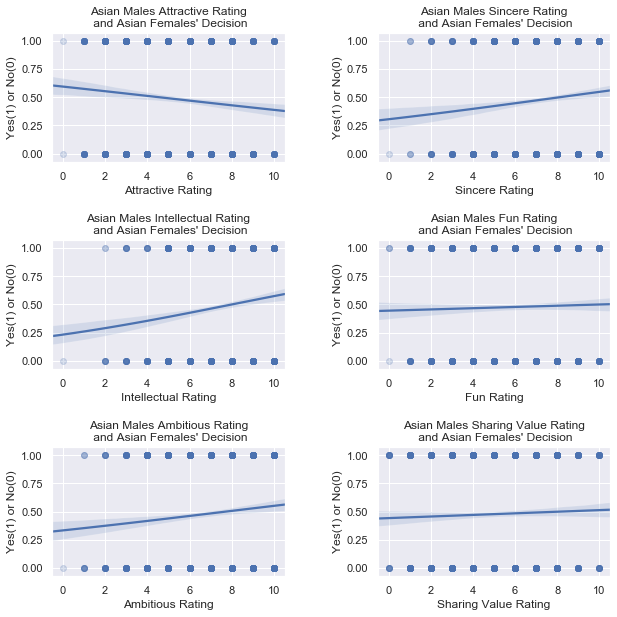

In [59]:
# visualize the logistic regression of Asian Males attributes rating by Asian Females
plt.figure(figsize = [10, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3, 2, 1)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['attr_o'],
            "Asian Females' Decision", "Attractive")

plt.subplot(3, 2, 2)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['sinc_o'],
            "Asian Females' Decision", "Sincere")


plt.subplot(3, 2, 3)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['intel_o'],
            "Asian Females' Decision", "Intellectual")

plt.subplot(3, 2, 4)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['fun_o'],
            "Asian Females' Decision", "Fun")

plt.subplot(3, 2, 5)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['amb_o'],
            "Asian Females' Decision", "Ambitious")

plt.subplot(3, 2, 6)
log_regplot(df_logit_asian, df_logit_asian['dec'], df_logit_asian['shar_o'],
            "Asian Females' Decision", "Sharing Value")

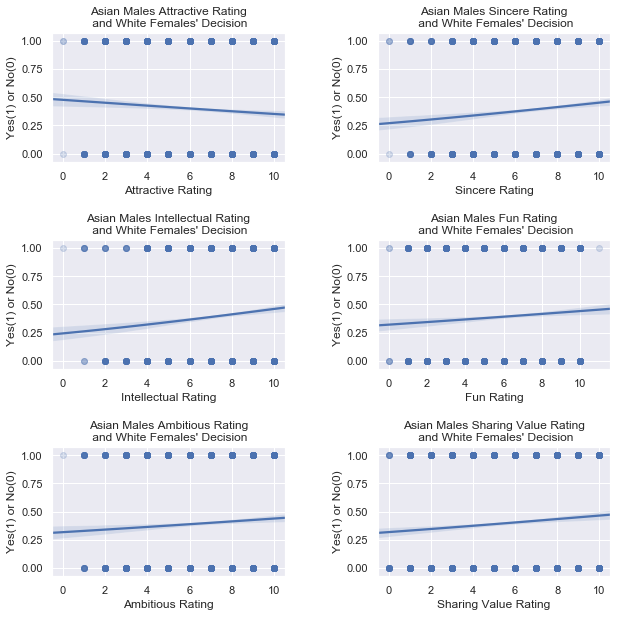

In [60]:
# visualize the logistic regression of Asian Males attributes rating by White Females
plt.figure(figsize = [10, 10])
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3, 2, 1)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['attr_o'],
            "White Females' Decision", "Attractive")

plt.subplot(3, 2, 2)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['sinc_o'],
            "White Females' Decision", "Sincere")


plt.subplot(3, 2, 3)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['intel_o'],
            "White Females' Decision", "Intellectual")

plt.subplot(3, 2, 4)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['fun_o'],
            "White Females' Decision", "Fun")


plt.subplot(3, 2, 5)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['amb_o'],
            "White Females' Decision", "Ambitious")

plt.subplot(3, 2, 6)
log_regplot(df_logit_white, df_logit_white['dec'], df_logit_white['shar_o'],
            "White Females' Decision", "Sharing Value")